# Лабораторная работа
В этой лабораторной работе вам предлагается решить задачу бинарной классификации на наборе данных Titanic с помощью фреймворка глубокого обучения TensorFlow.

Давайте убедимся, что необходимые нам для этой работы библиотеки уже установлены.

In [ ]:
!pip install numpy tensorflow_datasets tensorflow

# Описание набора данных
В данной работе целью исследования будет набор данных Titanic. Данный набор содержит информацию о различных пассажирах корабля "Титаник", затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д. Мы предлагаем вам натренировать нейронную сеть для бинарной классификации, способную предсказывать вероятность спасения человека на основе его данных.  

Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы - отдельный пассажир, вся информация о нем содержится в его строке. В столбце survived находится бинарная метка (0 или 1), означающая, спасся ли человек с корабля (1) или нет (0). Вашей задачей является изучить набор данных, корректно определить решаемую задачу, а затем построить модель, которая будет способна предсказывать вероятность спасения и посчитать F1-метрику на тестовом наборе данных.

Для загрузки набора данных мы снова будем использовать библиотеку tensorflow_datasets.

Импортируем данную библиотеку, а затем с помощью нее загрузим набор данных "titanic". В процессе загрузки сразу разделим его на тренировочную, валидационную и тестовую выборку.

In [ ]:
import tensorflow_datasets as tfds
ds_train_tf, ds_validation_tf, ds_test_tf = tfds.load(
    name='titanic',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True
)

По умолчанию библиотека загружает данные в формате TensorFlow Dataset. Этот формат позволяет оперировать данными на жестком диске без предварительной загрузки их в память, что позволят обучать модели на данных, превышающих размер оперативной памяти вашего устройства.

Набор данных Titanic является достаточно небольшим набором и мы уверены, что оперативной памяти вашего устройства хватит для хранения его целиком, поэтому это в данный момент не играет решающей роли. Однако, вам будет полезно научиться работать с ним.

Примеры использования и различных функций этого формата данных вы можете найти в документации Keras.

Давайте выведем первую строку тренировочного набора данных для ознакомления.

In [ ]:
for x, y in ds_train_tf.take(1):
    print(f"{x=}")
    print(f"{y=}")

x={'age': <tf.Tensor: shape=(), dtype=float32, numpy=30.0>, 'boat': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'body': <tf.Tensor: shape=(), dtype=int32, numpy=-1>, 'cabin': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'embarked': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'fare': <tf.Tensor: shape=(), dtype=float32, numpy=13.0>, 'home.dest': <tf.Tensor: shape=(), dtype=string, numpy=b'Sarnia, ON'>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'McCrie, Mr. James Matthew'>, 'parch': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'pclass': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'sibsp': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'ticket': <tf.Tensor: shape=(), dtype=string, numpy=b'233478'>}
y=<tf.Tensor: shape=(), dtype=int64, numpy=0>


Как можно заметить, формат текущего датасета представляет собой кортеж из двух элементов - признаков и метки класса. Признаки организованы как словарь с ключами (названиями признаков) и значениями признаков. Данный формат можно использовать напрямую для метода model.fit, однако признаки, несомненно, требуют предобработки.

Итак, к настоящему моменту мы загрузили набор данных, разделили его на тренировочную, валидационную и тестовую выборку и готовы приступить к решению задачи. Вашим финальным заданием является получение **максимального значения F1-метрики на тестовом наборе** данных, используя все возможности по изучению и визуализации данных, предобработке данных, а также нейронную сеть, выполненную с помощью фреймворка TensorFlow (и его части - Keras).  

Для того, чтобы напомнить процесс подготовки данных и обучения модели, мы поместили несколько ячеек с комментариями ниже в предполагаемом порядке. Однако, **вы** можете использовать любой удобный вам процесс.  

В процессе исследования и тренировки запрещено использовать данных из ds_test кроме как для финальной оценки F1 метрики. Данная лабораторная работа служит не для проверки ваших навыков, а для того, чтобы вы могли оттачить навыки обучения НС и работы с соответствующими библиотеками. Мы просим вас попытаться решить задачу самостоятельно, не используя доступную информацию из ds_test набора и не пытаясь подогнать модель под идеальную работу с конкретно данным набором, а также просим не использовать внешние источники данных и информацию из соответствующих соревнований на платформе Kaggle.

Вы можете найти для себя полезным пройти снова ноутбук с описанием работы фреймворка Keras и информацией о том, как его использовать. Также по данному фреймворку доступны многочисленные туториалы и примеры на его сайте. Напомним вам, что задача представляет собой бинарную классификацию, поэтому вам необходимо выбрать правильное количество нейронов для последнего слоя и функцию активации.

Успехов!

# Подготовка

Сначала попробуем сделать с данными в привычном виде, потом будет v2 с данными в формате Tf :)

In [ ]:
# Библиотеки
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import f1_score

In [ ]:
def tf_dataset_to_pd_dataframe(tf_dataset):
  features = []
  labels = []

  for feature, label in tf_dataset:
    features.append({key: value.numpy() for key, value in feature.items()})
    labels.append(label.numpy())

  features_df = pd.DataFrame(features)
  labels_df = pd.Series(labels, name='label')
  dataframe = pd.concat([features_df, labels_df], axis=1)
  return dataframe



In [ ]:
# Тренировочный
train_df = tf_dataset_to_pd_dataframe(ds_train_tf)
# Валид
valid_df = tf_dataset_to_pd_dataframe(ds_validation_tf)
# Тест
test_df = tf_dataset_to_pd_dataframe(ds_test_tf)


In [ ]:
train_df.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,ticket,label
0,30.0,b'Unknown',-1,b'Unknown',2,13.0000,"b'Sarnia, ON'","b'McCrie, Mr. James Matthew'",0,1,0,0,b'233478',0
1,37.0,b'Unknown',98,b'Unknown',2,7.9250,"b'Ruotsinphytaa, Finland New York, NY'","b'Gustafsson, Mr. Anders Vilhelm'",0,2,0,2,b'3101276',0
2,28.0,b'9',-1,b'Unknown',2,13.0000,b'Spain',"b'Reynaldo, Ms. Encarnacion'",0,1,1,0,b'230434',1
3,18.0,b'Unknown',-1,b'Unknown',2,73.5000,"b'Lyndhurst, England'","b'Davies, Mr. Charles Henry'",0,1,0,0,b'S.O.C. 14879',0
4,-1.0,b'Unknown',-1,b'Unknown',0,7.8958,b'Unknown',"b'Gheorgheff, Mr. Stanio'",0,2,0,0,b'349254',0


In [ ]:
train_df.tail()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,ticket,label
1042,29.0,b'Unknown',-1,b'G6',2,10.4625,b'Unknown',"b'Strom, Mrs. Wilhelm (Elna Matilda Persson)'",1,2,1,1,b'347054',0
1043,32.0,b'9',-1,b'Unknown',2,13.0000,b'Russia',"b'Pinsky, Mrs. (Rosa)'",0,1,1,0,b'234604',1
1044,-1.0,b'16',-1,b'Unknown',2,16.1000,"b'Liverpool, England Bedford, OH'","b'Davison, Mrs. Thomas Henry (Mary E Finck)'",0,2,1,1,b'386525',1
1045,4.0,b'Unknown',-1,b'Unknown',2,31.2750,"b'Sweden Winnipeg, MN'","b'Andersson, Master. Sigvard Harald Elias'",2,2,0,4,b'347082',0
1046,16.0,b'16',-1,b'Unknown',2,7.6500,"b'Norway Los Angeles, CA'","b'Abelseth, Miss. Karen Marie'",0,2,1,0,b'348125',1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1047 non-null   float32
 1   boat       1047 non-null   object 
 2   body       1047 non-null   int32  
 3   cabin      1047 non-null   object 
 4   embarked   1047 non-null   int64  
 5   fare       1047 non-null   float32
 6   home.dest  1047 non-null   object 
 7   name       1047 non-null   object 
 8   parch      1047 non-null   int32  
 9   pclass     1047 non-null   int64  
 10  sex        1047 non-null   int64  
 11  sibsp      1047 non-null   int32  
 12  ticket     1047 non-null   object 
 13  label      1047 non-null   int64  
dtypes: float32(2), int32(3), int64(4), object(5)
memory usage: 94.2+ KB


In [ ]:
train_df.describe()

,age,body,embarked,fare,parch,pclass,sex,sibsp,label
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,23.709330,15.529131,1.491882,33.690292,0.384909,1.295129,0.345750,0.498567,0.372493
std,18.025736,58.909813,0.817870,53.281200,0.856804,0.839856,0.475839,1.066502,0.483700
min,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-1.000000,1.000000,7.895800,0.000000,1.000000,0.000000,0.000000,0.000000
50%,24.000000,-1.000000,2.000000,14.454200,0.000000,2.000000,0.000000,0.000000,0.000000
75%,35.000000,-1.000000,2.000000,31.275000,0.000000,2.000000,1.000000,1.000000,1.000000
max,80.000000,328.000000,3.000000,512.329224,9.000000,2.000000,1.000000,8.000000,1.000000


- age: Возраст пассажира
- boat: Номер спасательной шлюпки
- body: Идентификационный номер тела, если тело было найдено.
- cabin: Номер каюты пассажира
- embarked: Порт посадки пассажира (0, 1, 2, 3)
- fare: Плата за проезд, которую заплатил
- home.dest: Пункт назначения пассажира.
- name: Имя пассажира
- parch: Количество родителей/детей пассажира на борту.
- pclass: Класс обслуживания пассажира (1 = первый класс, 2 = второй класс, 3 = третий класс).
- sex: Пол пассажира (0 = женщина, 1 = мужчина).
- sibsp: Количество братьев/сестер или супругов пассажира на борту
- ticket: Номер билета пассажира.
- label: Метка, указывающая, спасся ли пассажир (0 = не спасся, 1 = спасся)

# 1. Предобработка данных: заполнение пропущенных мест, приведение столбцов к единому виду, удаление nan/infinity значений

In [ ]:
train_df.body.value_counts()

body
-1      943
 147      1
 69       1
 70       1
 312      1
       ... 
 119      1
 173      1
 176      1
 260      1
 197      1
Name: count, Length: 105, dtype: int64

In [ ]:
train_df.boat.value_counts()

boat
b'Unknown'    666
b'15'          31
b'C'           30
b'14'          28
b'13'          26
b'5'           25
b'4'           22
b'3'           20
b'16'          20
b'10'          20
b'11'          19
b'8'           19
b'7'           18
b'9'           16
b'D'           16
b'6'           16
b'12'          14
b'2'           11
b'A'           10
b'B'            8
b'1'            4
b'13 15'        2
b'5 7'          1
b'C D'          1
b'15 16'        1
b'5 9'          1
b'13 15 B'      1
b'8 10'         1
Name: count, dtype: int64

In [ ]:
train_df['cabin']

0       b'Unknown'
1       b'Unknown'
2       b'Unknown'
3       b'Unknown'
4       b'Unknown'
           ...    
1042         b'G6'
1043    b'Unknown'
1044    b'Unknown'
1045    b'Unknown'
1046    b'Unknown'
Name: cabin, Length: 1047, dtype: object

In [ ]:
print(len(train_df[train_df['cabin'] == b'Unknown'])/train_df.shape[0]) # 77% пропусков

0.7765042979942693


Нужно удалить неинформативные признаки, которые никак не могут влиять на результативность нашего классификаторы (имя, тело, направление и тд) + пропущенные значения (cabin)

In [ ]:
train_df.columns

Index(['age', 'boat', 'body', 'cabin', 'embarked', 'fare', 'home.dest', 'name',
       'parch', 'pclass', 'sex', 'sibsp', 'ticket', 'label'],
      dtype='object')

In [ ]:
columns_to_drop = ['boat', 'body', 'cabin', 'home.dest', 'ticket', 'name']

train_df = train_df.drop(columns_to_drop, axis=1)
valid_df = valid_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)

In [ ]:
train_df.columns

Index(['age', 'embarked', 'fare', 'parch', 'pclass', 'sex', 'sibsp', 'label'], dtype='object')

In [ ]:
train_df.describe()

,age,embarked,fare,parch,pclass,sex,sibsp,label
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,23.709330,1.491882,33.690292,0.384909,1.295129,0.345750,0.498567,0.372493
std,18.025736,0.817870,53.281200,0.856804,0.839856,0.475839,1.066502,0.483700
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,7.895800,0.000000,1.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,14.454200,0.000000,2.000000,0.000000,0.000000,0.000000
75%,35.000000,2.000000,31.275000,0.000000,2.000000,1.000000,1.000000,1.000000
max,80.000000,3.000000,512.329224,9.000000,2.000000,1.000000,8.000000,1.000000


## Посмотрим на графики

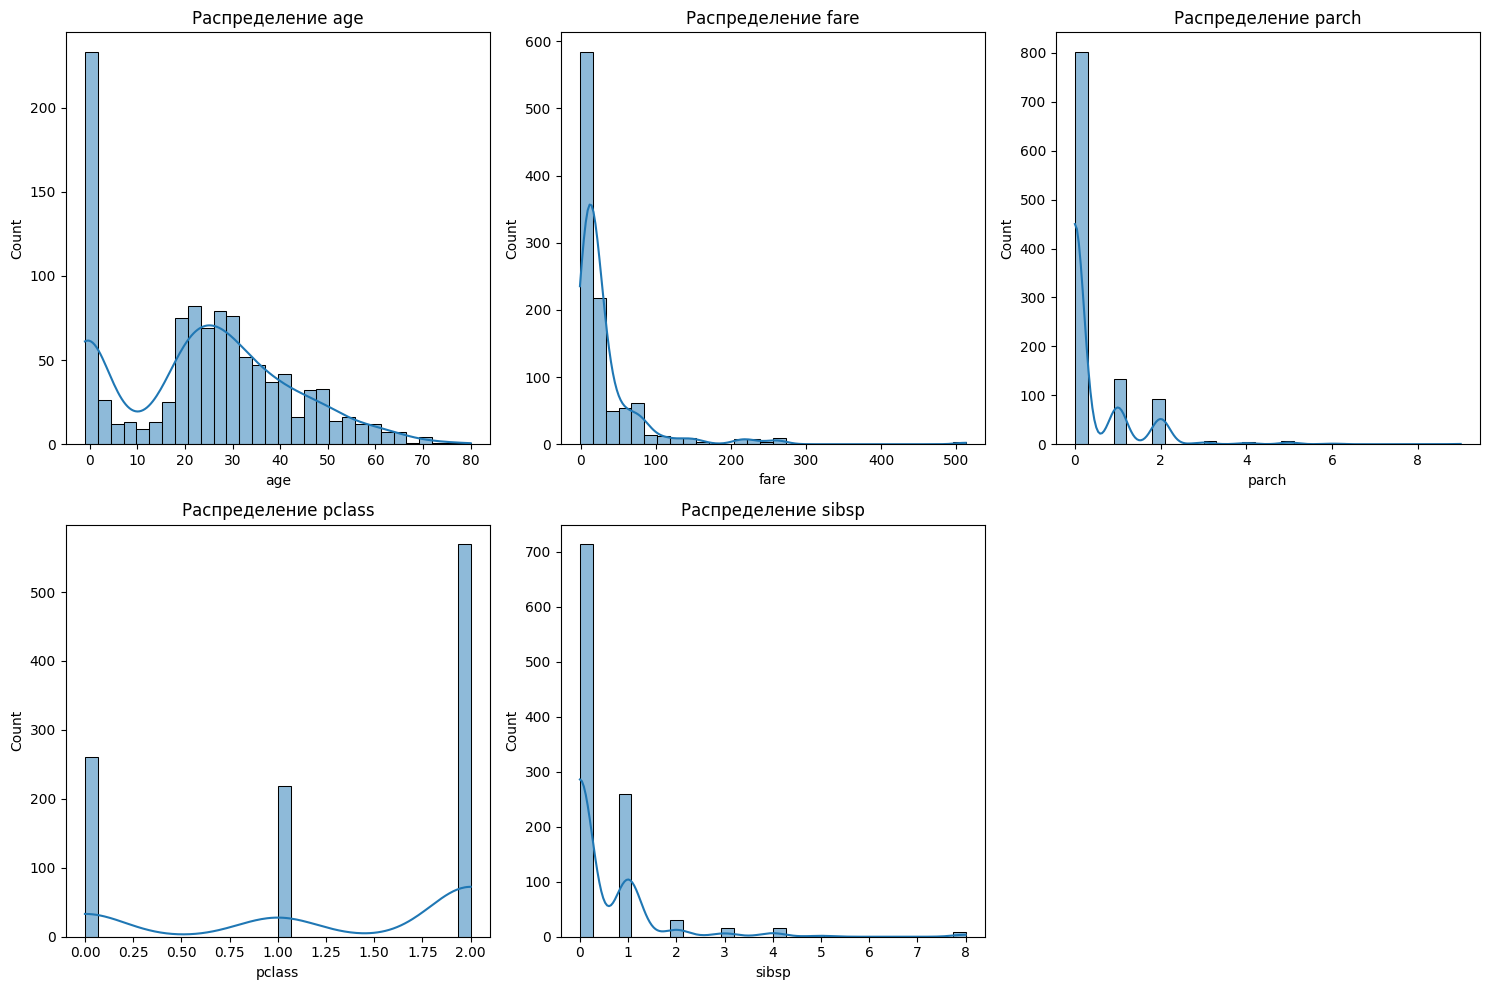

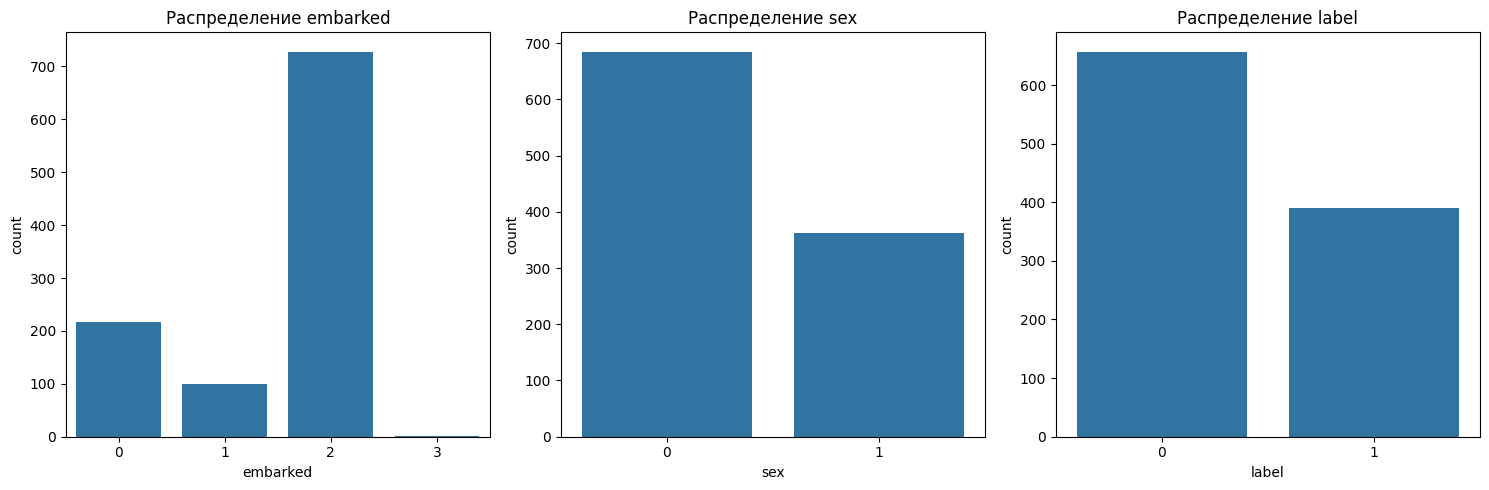

In [ ]:

numerical_columns = ['age', 'fare', 'parch', 'pclass', 'sibsp']
categorical_columns = ['embarked', 'sex', 'label']


plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[column], bins=30, kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=train_df[column])
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

In [ ]:
print(train_df['age'].value_counts())
len(train_df[train_df['age'] == -1])

age
-1.0000     215
 24.0000     39
 30.0000     35
 22.0000     34
 21.0000     32
           ... 
 80.0000      1
 24.5000      1
 0.3333       1
 23.5000      1
 11.5000      1
Name: count, Length: 97, dtype: int64


215

215 пропусков в возрасте

In [ ]:
print(train_df['fare'].value_counts())
len(train_df[train_df['fare'] == -1])

fare
8.050000     50
13.000000    49
7.750000     47
26.000000    42
7.895800     37
             ..
9.587500      1
34.654202     1
27.445801     1
18.787500     1
6.450000      1
Name: count, Length: 262, dtype: int64


1

все ок, всего одно значение -1, мб капитан)|

## Заполним пропуски

train_df = pd.get_dummies(train_df, columns=['embarked', 'sex'])
valid_df = pd.get_dummies(valid_df, columns=['embarked', 'sex'])
test_df = pd.get_dummies(test_df, columns=['embarked', 'sex'])

In [ ]:
# Заполним пропуски в age и fare средним значением по набору

def fill_values(data, columns):
  for column in columns:
    mean_value = data[data[column] != -1][column].mean()
    data[column] = data[column].replace(-1, mean_value)
  return data



In [ ]:
columns_to_fill = ['age', 'fare']

train_df = fill_values(train_df, columns_to_fill)
valid_df = fill_values(valid_df, columns_to_fill)
test_df = fill_values(test_df, columns_to_fill)

In [ ]:
train_df.describe()

,age,embarked,fare,parch,pclass,sex,sibsp,label
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,30.094551,1.491882,33.723457,0.384909,1.295129,0.345750,0.498567,0.372493
std,12.922915,0.817870,53.270393,0.856804,0.839856,0.475839,1.066502,0.483700
min,0.333300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,7.895800,0.000000,1.000000,0.000000,0.000000,0.000000
50%,30.094553,2.000000,14.454200,0.000000,2.000000,0.000000,0.000000,0.000000
75%,35.000000,2.000000,31.331250,0.000000,2.000000,1.000000,1.000000,1.000000
max,80.000000,3.000000,512.329224,9.000000,2.000000,1.000000,8.000000,1.000000


## Поделим данные на x и y

In [ ]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_valid = valid_df.drop('label', axis=1)
y_valid = valid_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

## Скалируем

In [ ]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Работа с моделью

In [ ]:
!pip install livelossplot

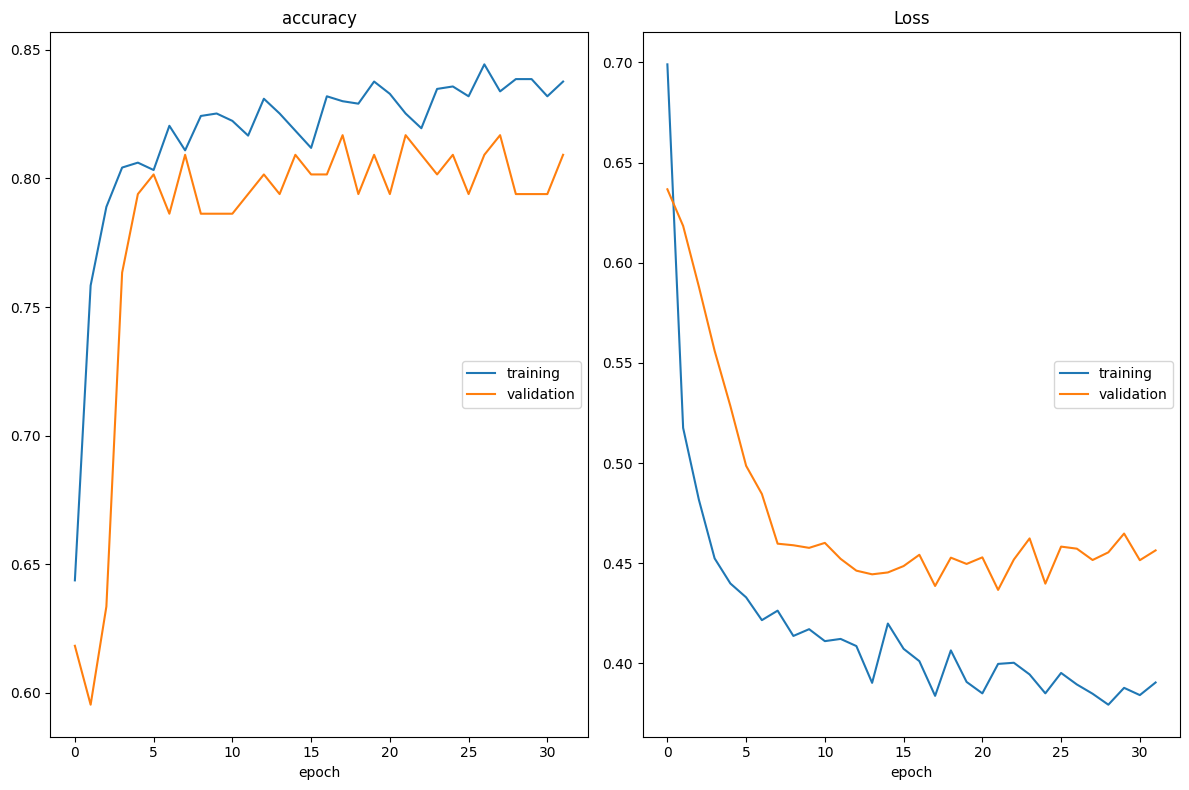

accuracy
	training         	 (min:    0.644, max:    0.844, cur:    0.838)
	validation       	 (min:    0.595, max:    0.817, cur:    0.809)
Loss
	training         	 (min:    0.379, max:    0.699, cur:    0.390)
	validation       	 (min:    0.437, max:    0.637, cur:    0.456)
33/33 [==============================] - 1s 27ms/step - loss: 0.3905 - accuracy: 0.8376 - val_loss: 0.4564 - val_accuracy: 0.8092


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # следим за валидационной потерей
plot_losses = PlotLossesKeras()


model = Sequential([
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid),
                    epochs=50, batch_size=32,
                    callbacks=[plot_losses, early_stopping])


Кажется без доп работы 0.8 на валиде это потолок :)))

В Целом на 20 эпохе можно остановится

# 1. Получение F1-метрики на тестовом наборе данных

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Значение: {f1}")

5/5 [==============================] - 0s 4ms/step
F1 Значение: 0.803908884034918
